# Proyecto Minería de Datos

**Objetivo General:** Crear un modelo con Machine Learning que pronostique tendencias, para relacionar productos que sean ideales para ventas cruzadas, en base a las transacciones de clientes.

**Dataset:** https://www.kaggle.com/mathchi/online-retail-ii-data-set-from-ml-repository

**Problema:** Para una empresa cualquiera, le es importante mejorar sus ventas o servicios de acuerdo a las necesidades del cliente. Los grandes negocios implementan procesos inteligentes acorde a las acciones de sus clientes, para lograr mejorar sus ingresos, algunos de estos procedimientos están basados en los conocimientos de marketing, Big Data, Smart Data, estadística. Sin embargo para lograr el objetivo de aumentar las ventas, es necesario tener una base de datos de las transacciones realizadas para el análisis de los datos, por tal motivo en este proyecto se enfoca en la creación de un modelo que pueda
predecir tendencias de agrupaciones de productos en base a las compras realizadas por diferentes clientes en una tienda de regalos del Reino Unido entre el 2009 y 2011.

**Tema:** Modelo de pronóstico de tendencias para ventas cruzadas de una tienda de regalos del
Reino Unido entre el 2009 a 2011

# Librerías

In [1]:
# Usada para la importación de los datos
import pandas as pd
# Usada para la graficación
import matplotlib.pyplot as plt
# Usada para la graficación
import seaborn as sns
# La escala para normalización
from sklearn.preprocessing import StandardScaler, RobustScaler
# Para la separación del dataset
from sklearn.model_selection import train_test_split
# Para selección de características
from sklearn.ensemble import RandomForestClassifier
# Para el preprocesamiento de los datos
from sklearn import preprocessing
# Para bining
import numpy as np

## Carga del dataset

En este apartado se hace un análisis de los datos, para saber si existen datos nulos, el número de registros, distribución de los datos.

**IMPORTACIÓN DEL DATASET**

In [2]:
#Función para la lectura del dataset
def importdata():
    df = pd.read_csv('dataset/originales/Year_2009-2010.csv',encoding='unicode_escape')
    print("\n **Estadísticas del dataset:** \n", df.describe().T)
    print("\n **Tamaño del dataset:** \n", df.shape)
    print("\n **Tipos de datos del dataset:** \n", df.dtypes)
    return df

In [3]:
df=importdata()
df


 **Estadísticas del dataset:** 
                 count          mean          std       min       25%      50%  \
Quantity     525461.0     10.337667   107.424110  -9600.00      1.00      3.0   
Price        525461.0      4.688834   146.126914 -53594.36      1.25      2.1   
Customer ID  417534.0  15360.645478  1680.811316  12346.00  13983.00  15311.0   

                  75%       max  
Quantity        10.00  19152.00  
Price            4.21  25111.09  
Customer ID  16799.00  18287.00  

 **Tamaño del dataset:** 
 (525461, 8)

 **Tipos de datos del dataset:** 
 Invoice         object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
Price          float64
Customer ID    float64
Country         object
dtype: object


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,12/1/2009 7:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,12/1/2009 7:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,12/1/2009 7:45,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,12/9/2010 20:01,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,12/9/2010 20:01,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,12/9/2010 20:01,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,12/9/2010 20:01,3.75,17530.0,United Kingdom


## Verificación y limpieza

**DATOS NULOS**

In [4]:
#Función para ver si existen datos nulos
def datosnull(df):
    existen_bol=1
    total_register=len(df.index)
    total_nan_values = df.isnull().sum().sum()
    existen=total_register-total_nan_values
    vars_with_na=columnan(df)
    if(existen != 0):
        print("\n ** Número de datos nulos: **\n", total_nan_values)
        print("\n ** Columnas con datos nulos: ** \n", df[vars_with_na].dtypes)
        print("\n ** Número de registros finales: ", existen ," registros de: ", len(df), " registros **")
        df=eraseregis(df)
        print(" \n Registros nulos borrados! \n")
        return existen_bol, df        
    else:
        print("\n No existen datos nulos\n ")

In [5]:
#Función para eliminación de registros con datos nulos
def eraseregis(data):
    data = data.dropna()
    return data

In [6]:
# Función para ver las columnas con datos nulos
def columnan(data):
    vars_with_na = [var for var in data.columns if data[var].isnull().mean() > 0]
    return vars_with_na

In [7]:
existen_bol, df_sin_nan=datosnull(df)


 ** Número de datos nulos: **
 110855

 ** Columnas con datos nulos: ** 
 Description     object
Customer ID    float64
dtype: object

 ** Número de registros finales:  414606  registros de:  525461  registros **
 
 Registros nulos borrados! 



In [8]:
df.iloc[[76,77]]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
76,489439,85014B,RED/WHITE DOTS RUFFLED UMBRELLA,3,12/1/2009 9:28,5.95,12682.0,France
77,489439,16161P,WRAP ENGLISH ROSE,25,12/1/2009 9:28,0.42,12682.0,France


In [9]:
# Creación del dataset solo con United Kingdom
def selecUnitedKingdom(df):
    indices = []
    #df_new = pd.DataFrame()
    for i in df.index: 
         if(df["Country"][i] == "United Kingdom"):
            #df_new.append(df.loc[[i]])
            indices.append(i)
    return indices

In [10]:
df_united_2=selecUnitedKingdom(df)

In [11]:
df_united = df.iloc[df_united_2]
df_united

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,12/1/2009 7:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,12/1/2009 7:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,12/1/2009 7:45,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,12/9/2010 20:01,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,12/9/2010 20:01,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,12/9/2010 20:01,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,12/9/2010 20:01,3.75,17530.0,United Kingdom


<AxesSubplot:>

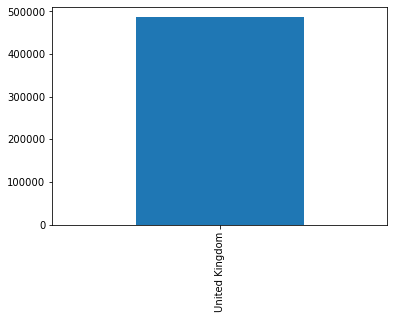

In [12]:
df_united.Country.value_counts().plot(kind = "bar")

In [13]:
# Función que convierte a enteros después de eliminar datos nulos 
def eliminaregistros(x):
    #Elimina los registros que tenga valor NaN
    existen_bol, df_sin_nan = datosnull(x)
    #Convierte a entero
    df_sin_nan=df_sin_nan.astype(int)
    print("Nuevo dataset: \n", df_sin_nan)
    print("Tipos de datos: \n", df_sin_nan.dtypes)
    return df_sin_nan

In [14]:
# Se crea el conteo de los registros repetidos en descripción
dups = df_sin_nan.pivot_table(index=['Description'], aggfunc ='size') 
# Se crea un data frame y se añade la columna 'Repeticion'
gh = pd.DataFrame(dups, columns=['Repeticion'])
# Se observa el número de repeticiones de Descripción en orden
by_repet = gh.sort_values('Repeticion',ascending=False)
by_repet.head(50)

,Repeticion
Description,
WHITE HANGING HEART T-LIGHT HOLDER,3245
REGENCY CAKESTAND 3 TIER,1872
STRAWBERRY CERAMIC TRINKET BOX,1536
ASSORTED COLOUR BIRD ORNAMENT,1376
HOME BUILDING BLOCK WORD,1229
PACK OF 72 RETRO SPOT CAKE CASES,1214
REX CASH+CARRY JUMBO SHOPPER,1195
60 TEATIME FAIRY CAKE CASES,1195
JUMBO BAG RED RETROSPOT,1114


In [15]:
df_united.dtypes

Invoice         object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
Price          float64
Customer ID    float64
Country         object
dtype: object

In [16]:
# Verifica los registros en Invoice que contenga C
# Los registros con C, significan que han sido canceladas, por tal motivo se les borra
verificar = np.where(df_united['Invoice'].str.contains('C', regex=True).tolist())
verificar

(array([   157,    158,    159, ..., 485088, 485089, 485673], dtype=int64),)

In [17]:
verificar2 = df_united.iloc[verificar].index
verificar2

Int64Index([   196,    197,    198,    199,    200,    201,    202,    203,
               204,    205,
            ...
            524682, 524686, 524687, 524688, 524691, 524692, 524696, 524697,
            524698, 525282],
           dtype='int64', length=8794)

In [18]:
df_united.iloc[[157]]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
196,C489459,90200A,PURPLE SWEETHEART BRACELET,-3,12/1/2009 10:44,4.25,17592.0,United Kingdom


In [19]:
df_united = df_united.drop(verificar2)

In [20]:
df_united

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,12/1/2009 7:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,12/1/2009 7:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,12/1/2009 7:45,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,12/9/2010 20:01,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,12/9/2010 20:01,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,12/9/2010 20:01,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,12/9/2010 20:01,3.75,17530.0,United Kingdom


In [21]:
#Función para realizar algunos procesos en los datos para limpiarlos y borrar registros con errores
def limpieza(x):
    #Elimina letras del StockCode
    x['Invoice'] = x['Invoice'].replace({'[A-Z]':''}, regex=True)
    #Para convertir StockCode de objeto a numérico
    x['Invoice'] = pd.to_numeric(x['StockCode'], errors='coerce')
    print("Nuevo dataset: \n", x)
    print("Tipos de datos: \n", x.dtypes)
    return x

In [22]:
df_united=limpieza(df_united)

Nuevo dataset: 
         Invoice StockCode                          Description  Quantity  \
0       85048.0     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1           NaN    79323P                   PINK CHERRY LIGHTS        12   
2           NaN    79323W                  WHITE CHERRY LIGHTS        12   
3       22041.0     22041         RECORD FRAME 7" SINGLE SIZE         48   
4       21232.0     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
...         ...       ...                                  ...       ...   
525456  22271.0     22271                 FELTCRAFT DOLL ROSIE         2   
525457  22750.0     22750         FELTCRAFT PRINCESS LOLA DOLL         1   
525458  22751.0     22751       FELTCRAFT PRINCESS OLIVIA DOLL         1   
525459  20970.0     20970   PINK FLORAL FELTCRAFT SHOULDER BAG         2   
525460  21931.0     21931               JUMBO STORAGE BAG SUKI         2   

            InvoiceDate  Price  Customer ID         Country  
0       

In [23]:
existen_bol, df_united=datosnull(df_united)
df_united


 ** Número de datos nulos: **
 182031

 ** Columnas con datos nulos: ** 
 Invoice        float64
Description     object
Customer ID    float64
dtype: object

 ** Número de registros finales:  295027  registros de:  477058  registros **
 
 Registros nulos borrados! 



,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,85048.0,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,12/1/2009 7:45,6.95,13085.0,United Kingdom
3,22041.0,22041,"RECORD FRAME 7"" SINGLE SIZE",48,12/1/2009 7:45,2.10,13085.0,United Kingdom
4,21232.0,21232,STRAWBERRY CERAMIC TRINKET BOX,24,12/1/2009 7:45,1.25,13085.0,United Kingdom
5,22064.0,22064,PINK DOUGHNUT TRINKET POT,24,12/1/2009 7:45,1.65,13085.0,United Kingdom
6,21871.0,21871,SAVE THE PLANET MUG,24,12/1/2009 7:45,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,22271.0,22271,FELTCRAFT DOLL ROSIE,2,12/9/2010 20:01,2.95,17530.0,United Kingdom
525457,22750.0,22750,FELTCRAFT PRINCESS LOLA DOLL,1,12/9/2010 20:01,3.75,17530.0,United Kingdom
525458,22751.0,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,12/9/2010 20:01,3.75,17530.0,United Kingdom
525459,20970.0,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,12/9/2010 20:01,3.75,17530.0,United Kingdom


In [24]:
# Seleccionar todas las columnas de tipo objeto
df_sin_nan_2 = df_united.select_dtypes(include=[object])
df_sin_nan_2.head(3)

,StockCode,Description,InvoiceDate,Country
0,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12/1/2009 7:45,United Kingdom
3,22041,"RECORD FRAME 7"" SINGLE SIZE",12/1/2009 7:45,United Kingdom
4,21232,STRAWBERRY CERAMIC TRINKET BOX,12/1/2009 7:45,United Kingdom


In [25]:
# Comprobar las columnas que se cogen que sean de tipo objeto
df_sin_nan_2.columns

Index(['StockCode', 'Description', 'InvoiceDate', 'Country'], dtype='object')

In [26]:
# Transfomración de datos categóricos a numéricos
le = preprocessing.LabelEncoder()
# Se transforman todas las columnas
X_2 = df_sin_nan_2.apply(le.fit_transform)
X_2

,StockCode,Description,InvoiceDate,Country
0,2526,46,4839,0
3,1127,2135,4839,0
4,497,2727,4839,0
5,1150,1988,4839,0
6,1017,2378,4839,0
...,...,...,...,...
525456,1342,982,6686,0
525457,1793,991,6686,0
525458,1794,992,6686,0
525459,295,1992,6686,0


In [27]:
# Selección de columnas para el primer conjunto de datos
columns_use = ["Quantity","Price","Customer ID"]

In [28]:
df_2 = df_united[columns_use]
df_2

,Quantity,Price,Customer ID
0,12,6.95,13085.0
3,48,2.10,13085.0
4,24,1.25,13085.0
5,24,1.65,13085.0
6,24,1.25,13085.0
...,...,...,...
525456,2,2.95,17530.0
525457,1,3.75,17530.0
525458,1,3.75,17530.0
525459,2,3.75,17530.0


In [29]:
# Unión de los dos conjuntos de datos
def uniondatos(df_1, df_2):
    df_unido = pd.concat([df_1, df_2], axis=1,)
    return df_unido

In [30]:
# Unión de los dos conjuntos de datos
df_unido = uniondatos(df_2, X_2)
df_unido.dtypes

Quantity         int64
Price          float64
Customer ID    float64
StockCode        int32
Description      int32
InvoiceDate      int32
Country          int32
dtype: object

In [31]:
df_int=df_unido[["StockCode","Customer ID"]].astype(int)

In [32]:
df_unido=df_unido.drop(['StockCode'], axis=1)
df_unido=df_unido.drop(['Customer ID'], axis=1)

In [33]:
df_unido=uniondatos(df_int, df_unido)
df_unido

,StockCode,Customer ID,Quantity,Price,Description,InvoiceDate,Country
0,2526,13085,12,6.95,46,4839,0
3,1127,13085,48,2.10,2135,4839,0
4,497,13085,24,1.25,2727,4839,0
5,1150,13085,24,1.65,1988,4839,0
6,1017,13085,24,1.25,2378,4839,0
...,...,...,...,...,...,...,...
525456,1342,17530,2,2.95,982,6686,0
525457,1793,17530,1,3.75,991,6686,0
525458,1794,17530,1,3.75,992,6686,0
525459,295,17530,2,3.75,1992,6686,0


In [34]:
# Separado para realizar la estandarización
for_standa = pd.DataFrame(df_unido[['Quantity','Price']], columns=['Quantity','Price'])

In [35]:
df_unido=df_unido.drop(['Quantity'], axis=1)
df_unido=df_unido.drop(['Price'], axis=1)
df_unido=df_unido.drop(['Country'], axis=1)

In [36]:
df_unido

,StockCode,Customer ID,Description,InvoiceDate
0,2526,13085,46,4839
3,1127,13085,2135,4839
4,497,13085,2727,4839
5,1150,13085,1988,4839
6,1017,13085,2378,4839
...,...,...,...,...
525456,1342,17530,982,6686
525457,1793,17530,991,6686
525458,1794,17530,992,6686
525459,295,17530,1992,6686


## Ingeniería de características

**DIVISIÓN DEL DATASET y HALLAR X, Y**

In [37]:
#División del dataset, en conjunto de datos de entrenamiento y otro conjunto para las pruebas
def slipdata(df, nombreColumna):
    # Selección de características
    x = df.drop(nombreColumna, axis=1)
    y = df[nombreColumna]
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=109)
    return X_train, X_test, y_train, y_test

**ESTANDARIZACIÓN**

In [38]:
#Estandarización de la columna Price
def estandarizacion(df_unido, nombreColumna):
    Standariza=(df_unido[nombreColumna]-df_unido[nombreColumna].mean())/df_unido[nombreColumna].std()
    Standariza = pd.DataFrame(Standariza)
    return Standariza

In [39]:
# Función de la gráfica de la estandarización
def graficar(X_train,X_train_scaled):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 6))

    for (label, content) in X_train.iteritems():
        ax1.set_title('Antes del escalado')
        sns.kdeplot(X_train[label], ax=ax1, label=label)
        leg = ax1.legend(loc="upper right", bbox_to_anchor=[0, 1], ncol=2, shadow=True, title="Características", fancybox=True)
    
    for (label, content) in X_train_scaled.iteritems():
        ax2.set_title('Después del escalado')
        sns.kdeplot(X_train_scaled[label], ax=ax2, label=label)
        leg = ax2.legend(loc="upper right", bbox_to_anchor=[0, 1], ncol=2, shadow=True, title="Características", fancybox=True)

    plt.show()

In [40]:
Standariza_precio=estandarizacion(for_standa, 'Price')
Standariza_Quantity=estandarizacion(for_standa, 'Quantity')

In [41]:
#Unión de datos estandarizados con los actuales
data_unido2=uniondatos(Standariza_precio, Standariza_Quantity)

In [42]:
data_unido3=uniondatos(df_unido, data_unido2)
data_unido3

,StockCode,Customer ID,Description,InvoiceDate,Price,Quantity
0,2526,13085,46,4839,0.882579,-0.000477
3,1127,13085,2135,4839,-0.198194,0.516378
4,497,13085,2727,4839,-0.387608,0.171808
5,1150,13085,1988,4839,-0.298472,0.171808
6,1017,13085,2378,4839,-0.387608,0.171808
...,...,...,...,...,...,...
525456,1342,17530,982,6686,-0.008780,-0.144048
525457,1793,17530,991,6686,0.169492,-0.158405
525458,1794,17530,992,6686,0.169492,-0.158405
525459,295,17530,1992,6686,0.169492,-0.144048


In [43]:
X_train, X_test, y_train, y_test=slipdata(data_unido3, 'Customer ID')

## SELECCIÓN DE CARACTERÍSTICAS

In [ ]:
RF = RandomForestClassifier(max_depth=7, n_estimators=100)
RF.fit(X_train, y_train)
y_pred_RF= RF.predict(X_test)

df_3 = pd.DataFrame()

cols = ['Machine Learning Classification Method',
        'Train Accuracy', 
        'Test Accuracy', 
        "Top 1 Feature Predictor",
        "Top 2 Feature Predictor",
        "Top 3 Feature Predictor",
        "Top 4 Feature Predictor",
        "Top 5 Feature Predictor"]

df_3.loc['Machine Learning Classification Method', 
       'Details'] = 'Random Forest Classifier'
df_3.loc['Train Accuracy', 'Details'] = RF.score(X_train, y_train) 
df_3.loc['Test Accuracy', 'Details'] = RF.score(X_test, y_test)

#random forest para selección de características

feature_importances = X.columns[np.argsort(RF.feature_importances_)][-5:]
df_3.loc['Top 1 Feature Predictor', 'Details'] = feature_importances[4]
df_3.loc['Top 2 Feature Predictor', 'Details'] = feature_importances[3]
df_3.loc['Top 3 Feature Predictor', 'Details'] = feature_importances[2]
df_3.loc['Top 4 Feature Predictor', 'Details'] = feature_importances[1]
df_3.loc['Top 5 Feature Predictor', 'Details'] = feature_importances[0]

display(df_3)

<AxesSubplot:>

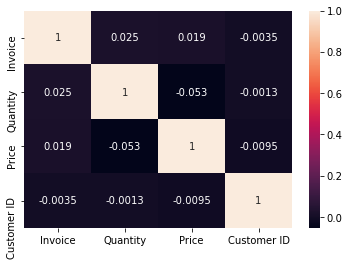

In [44]:
#Dataset sin datos nulos  FIGURA 1
sns.heatmap(df_united.corr(), annot=True)

<AxesSubplot:>

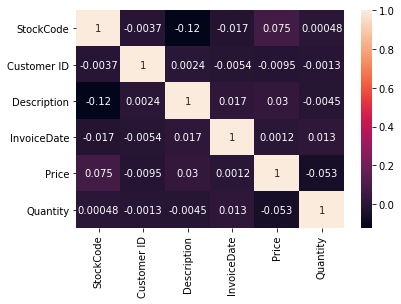

In [45]:
# datasetfinal  FIGURA 2
sns.heatmap(data_unido3.corr(), annot=True)

<AxesSubplot:>

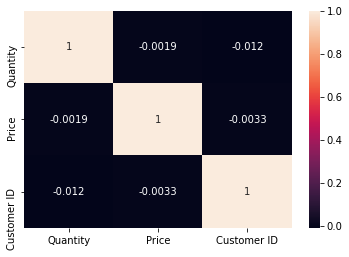

In [46]:
#dataset original  FIGURA 3
sns.heatmap(df.corr(), annot=True)

**Interpretación de resultados**

Dado la cantidad de datos que se le pasan al algoritmo de random forest, este modelo tiende a colgar la máquina, por ese motivo se usó la matriz de de mapa de calor. Como se visualiza en la Figura 2, los datos que tienen más relación entre sí son: Customer ID y Country. Así mismo otros datos que tienen una relación baja son Price y StockCode, lo que quiere decir que existe más relación entre datos que relativamente no son importantes para el objetivo de este proyecto y con respecto a los datos inmediatos para la resolución de este proceso tienen una baja relación. Por tal motivo se procedió a verificar estos mapas de calor antes del proceso de limpieza y verificación (véase Figura 3) y cuando se encontraba en la mitad Figura 1. Lo que indica que mediante el proceso de limpieza los resultados que entrega el mapa de calor mejoran. Esto se puede comprobar con el valor de 'Price' y ' Quantity'. En base a estos resultados, se considera que las mejores características son: Customer ID, Country, StockCode y Price.

# Creación del archivo del dataset

In [50]:
# Creación del archivo
data_unido3.to_csv(r'C:\Users\Usuario\data mining\ProMD\dataset\DatasetFinal.csv', index = False)

In [51]:
df_f2 = pd.read_csv('dataset/DatasetFinal.csv')

In [53]:
df_f2.shape

(318905, 6)